In this notebook, we will visualize the publishing frequency of Welt articles before and after pre-processing, highlighting the impact of the pre-processing steps on the dataset.

In [1]:
import os
import pandas as pd
from ast import literal_eval

# Set the path variable to point to the 'newspaper_data_processing' directory, which is located in the same 
# parent directory as 'newspaper_analysis'. This is the repository used for data pre-processing.
path = os.getcwd().replace('\\newspaper_analysis\\data', '') + '\\newspaper_data_processing'

# Load pre-processed 'Welt' dataset from a CSV file.
welt = pd.read_csv(path + '\\Welt\\' + 'welt_prepro_final.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'rubrics': 'str',
                                                                                                 'title': 'str'})
welt.title = welt.title.fillna('')
welt.rubrics = welt.rubrics.fillna('') 

# Load the raw 'Welt' dataset from a CSV file.
welt_raw = pd.read_csv(path + '\\Welt\\' + 'welt_raw.csv', encoding = 'utf-8-sig', sep=';', index_col = 0, dtype = {'newspaper': 'str',
                                                                                                 'rubrics': 'str',
                                                                                                 'title': 'str'})
welt_raw.title = welt_raw.title.fillna('')
welt_raw.rubrics = welt_raw.rubrics.fillna('') 

In [2]:
# Create a 'date' column in the 'welt_raw' DataFrame
welt_raw['date'] = pd.to_datetime(welt_raw[['year', 'month', 'day']])
# Convert 'date' column to datetime
welt['date'] = pd.to_datetime(welt['date'])
welt_raw['date'] = pd.to_datetime(welt_raw['date'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


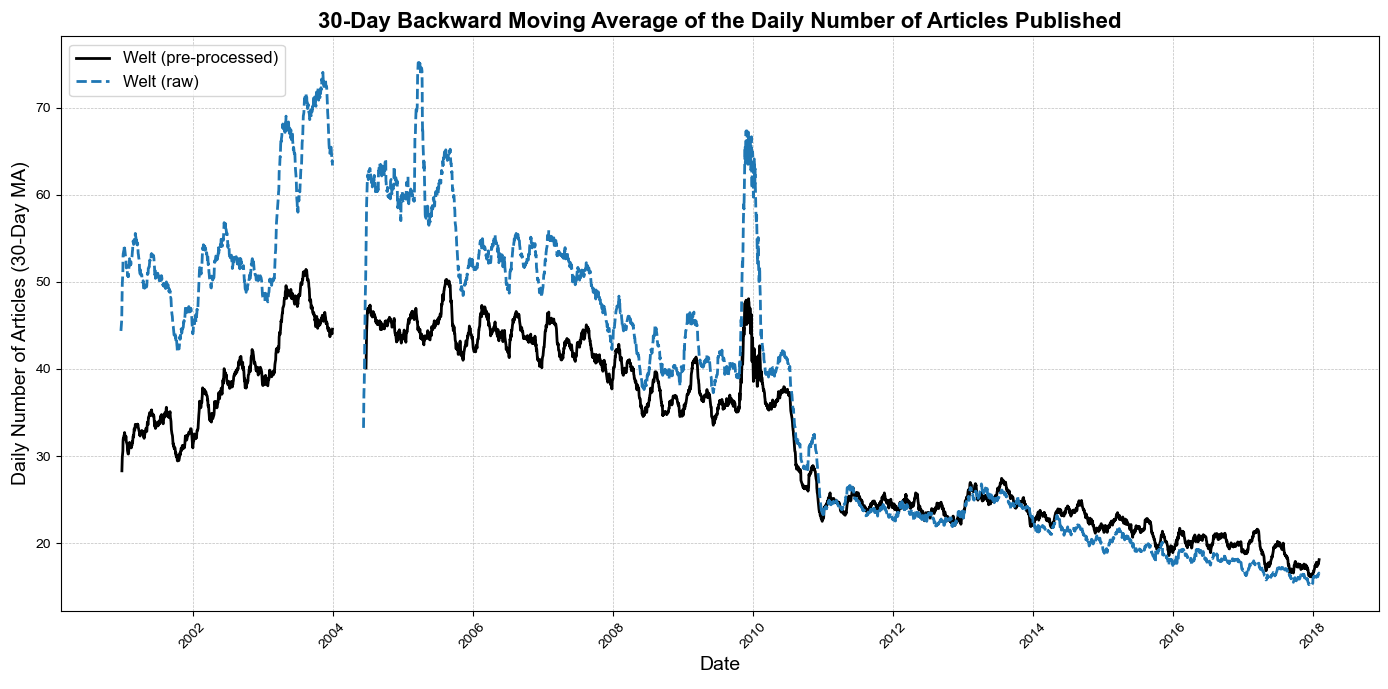

In [3]:
import matplotlib.pyplot as plt

periods = [
    ('2000-11-20', '2003-12-31'),
    ('2004-05-01', '2018-01-31')
]

# Set the figure size for better visibility
plt.figure(figsize=(14, 7))

# Plot each period for Welt separately to handle the gap
for start, end in periods:
    period_df = welt[(welt['date'] >= pd.Timestamp(start)) & (welt['date'] <= pd.Timestamp(end))]
    daily_count_period = period_df.groupby(period_df['date'].dt.date).size()
    ma_period = daily_count_period.rolling(window=30).mean()
    plt.plot(ma_period.index, ma_period, label='Welt (pre-processed)' if start == periods[0][0] else "__nolegend__", color='black', linewidth=2)

# Get the first color from the current color cycle
default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

# Repeat the same for 'welt_raw'
for start, end in periods:
    period_df = welt_raw[(welt_raw['date'] >= pd.Timestamp(start)) & (welt_raw['date'] <= pd.Timestamp(end))]
    daily_count_period = period_df.groupby(period_df['date'].dt.date).size()
    ma_period_raw = daily_count_period.rolling(window=30).mean()
    plt.plot(ma_period_raw.index, ma_period_raw, label='Welt (raw)' if start == periods[0][0] else "__nolegend__", color=default_color, linewidth=2, linestyle='dashed')

# Enhance the plot with a title, axis labels, and legend
plt.title('30-Day Backward Moving Average of the Daily Number of Articles Published', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Number of Articles (30-Day MA)', fontsize=14)
plt.legend(fontsize=12, loc='upper left')

# Improve readability of the x-axis labels
plt.xticks(rotation=45)

# Set grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Tighten the layout to make full use of space
plt.tight_layout()

# Apply a sophisticated look with a predefined style
plt.style.use('seaborn-darkgrid')

# Save the plot
plt.savefig('welt_daily_publications.eps', format='eps')
plt.savefig('welt_daily_publications.png', format='png')

# Show the plot
plt.show()